<a href="https://colab.research.google.com/github/tdeepakb/deep/blob/master/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import numpy as np

In [2]:
input_dir= '/content/drive/MyDrive/Cats_and_Dogs_Dataset'

In [3]:
categories=['Cat500','Dog500']
for category in categories:
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path=os.path.join(input_dir,category,file)
    print(img_path)

/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.124.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.122.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.139.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.131.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.140.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.111.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.14.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.120.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.126.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.135.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.102.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.119.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.13.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.133.jpg
/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.121.jpg
/content/drive/MyDrive/Cats_and_Dogs_Datas

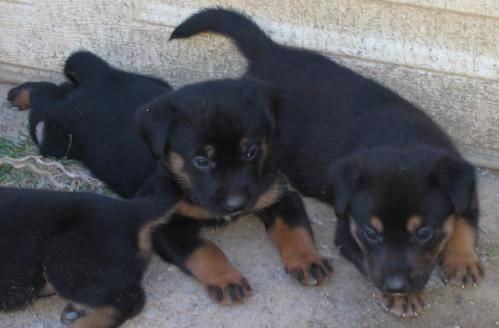

In [6]:
Image.open('/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.500.jpg')

In [7]:
img_path='/content/drive/MyDrive/Cats_and_Dogs_Dataset/Dog500/dog.500.jpg'

In [8]:
# Converting an image to numpy array
img=imread(img_path)
print(img)

[[[172 167 164]
  [170 165 162]
  [170 165 161]
  ...
  [218 210 199]
  [213 203 193]
  [205 195 185]]

 [[190 185 182]
  [191 186 183]
  [193 188 185]
  ...
  [220 212 201]
  [216 206 196]
  [209 199 189]]

 [[201 195 195]
  [205 200 197]
  [210 205 202]
  ...
  [221 215 203]
  [218 210 199]
  [212 204 193]]

 ...

 [[143 140 151]
  [133 130 141]
  [130 128 141]
  ...
  [110 106 105]
  [112 111 109]
  [118 117 115]]

 [[140 137 148]
  [133 130 141]
  [133 131 144]
  ...
  [118 114 113]
  [119 118 116]
  [123 122 120]]

 [[130 127 138]
  [127 124 135]
  [130 128 141]
  ...
  [114 110 109]
  [114 113 111]
  [116 115 113]]]


In [9]:
# resize and flattening the numpy array
img=resize(img,(15,15))
img

array([[[0.76945926, 0.77047999, 0.77476972],
        [0.77385056, 0.7772166 , 0.77849367],
        [0.76801166, 0.76841678, 0.76953761],
        [0.75492422, 0.75657042, 0.7531761 ],
        [0.77281945, 0.77960547, 0.77945589],
        [0.65667213, 0.66862693, 0.67987541],
        [0.44547474, 0.45424194, 0.46485923],
        [0.59884231, 0.59669936, 0.58714021],
        [0.75683834, 0.73986662, 0.70617157],
        [0.76047492, 0.74254139, 0.69405678],
        [0.76900233, 0.74568681, 0.68992219],
        [0.77835031, 0.74412611, 0.68257682],
        [0.78810106, 0.75184303, 0.68566755],
        [0.80297249, 0.77368423, 0.70341898],
        [0.81575634, 0.7905125 , 0.72118243]],

       [[0.75257732, 0.75500869, 0.76542875],
        [0.75064379, 0.75264607, 0.76097054],
        [0.73047414, 0.73610038, 0.74558455],
        [0.71108397, 0.71806587, 0.72717752],
        [0.68369665, 0.68609652, 0.68620214],
        [0.47857261, 0.48078049, 0.47721298],
        [0.35629336, 0.35291609,

In [10]:
img=img.flatten()

In [11]:
# creating two empty list as data and labels
data=[]
labels=[]

In [12]:
for category_idx, category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path=os.path.join(input_dir,category,file)
    img=imread(img_path)
    img=resize(img,(15,15))
    data.append(img.flatten())
    labels.append(category_idx)

In [13]:
labels= np.asarray(labels)
data= np.asarray(data)

Logistic Regression

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data,labels,test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.57

Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.52

Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train, y_train)
y_pred= rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.6

In [31]:
rfc= RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200.500],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [4,5,6,7,8],
    'criterion': ['gini','entropy']
}


In [40]:
from sklearn.model_selection import GridSearchCV

In [44]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(x_train,y_train)
CV_rfc.best_params_
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators=200, max_depth=8, criterion='gini')
rfc1.fit(x_train, y_train)
pred=rfc1.predict(x_test)
print('Accuracy for Random Forest on data: ', accuracy_score(y_test, y_pred))

ValueError: 
All the 150 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'n_estimators' parameter of RandomForestClassifier must be an int in the range [1, inf). Got 200.5 instead.


In [37]:
import pandas as pd

In [38]:
pd.DataFrame({'Actual_value':y_test,'Predicted_Value':y_pred})

,Actual_value,Predicted_Value
0,1,0
1,1,0
2,1,1
3,1,0
4,0,1
...,...,...
195,0,1
196,0,0
197,0,0
198,1,1
